Dataset shape: (442, 10)
Number of features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Linear Regression Results:
Train MSE: 2868.55, Test MSE: 2900.19
Train R²: 0.528, Test R²: 0.453

Ridge Regression Results:
Train MSE: 2870.30, Test MSE: 2892.01
Train R²: 0.528, Test R²: 0.454

Lasso Regression Results:
Train MSE: 2872.79, Test MSE: 2884.62
Train R²: 0.527, Test R²: 0.456

COEFFICIENT COMPARISON
  Feature     Linear      Ridge      Lasso
0     age   1.753758   1.807342   1.730451
1     sex -11.511809 -11.448190 -11.316359
2     bmi  25.607121  25.732699  25.824627
3      bp  16.828872  16.734300  16.644252
4      s1 -44.448856 -34.671954 -29.358412
5      s2  24.640954  17.053075  13.275844
6      s3   7.676978   3.369914   0.547948
7      s4  13.138784  11.764260  10.236168
8      s5  35.161195  31.378384  29.632826
9      s6   2.351364   2.458139   2.393475

Features removed by Lasso (coefficient = 0): []
Number of features kept by Lasso: 1

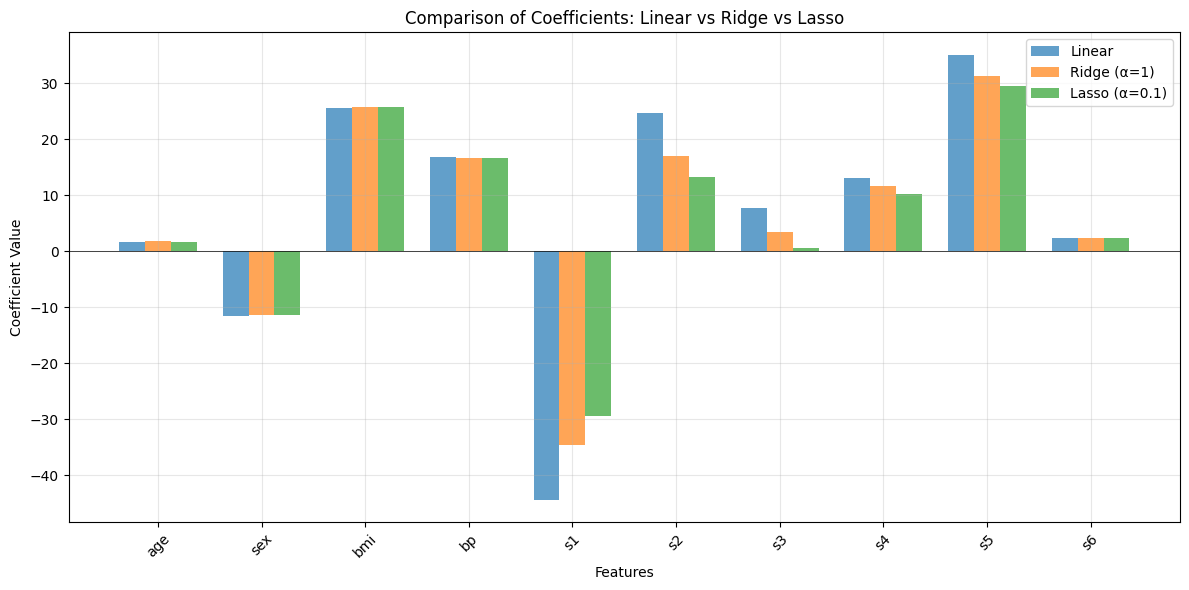


EFFECT OF DIFFERENT α VALUES ON LASSO
α = 0.001: 10 non-zero coefficients, Test MSE = 2900.01
α = 0.01: 10 non-zero coefficients, Test MSE = 2898.37
α = 0.1: 10 non-zero coefficients, Test MSE = 2884.62
α = 1: 9 non-zero coefficients, Test MSE = 2824.57
α = 10: 4 non-zero coefficients, Test MSE = 2933.83

Optimal alpha from tested values: 1.0


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling - Important for regularization!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models
# 1. Linear Regression (No regularization)
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# 2. Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # alpha = λ
ridge_model.fit(X_train_scaled, y_train)

# 3. Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # alpha = λ
lasso_model.fit(X_train_scaled, y_train)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
    
    return test_mse, test_r2

# Evaluate all models
linear_results = evaluate_model(linear_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")
ridge_results = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")
lasso_results = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")

# Compare coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

print("\n" + "="*60)
print("COEFFICIENT COMPARISON")
print("="*60)
print(coefficients)

# Identify features removed by Lasso (coefficients = 0)
zero_coeff_features = coefficients[coefficients['Lasso'] == 0]['Feature']
print(f"\nFeatures removed by Lasso (coefficient = 0): {zero_coeff_features.tolist()}")
print(f"Number of features kept by Lasso: {(coefficients['Lasso'] != 0).sum()}/10")

# Visualize coefficients
plt.figure(figsize=(12, 6))
x_index = np.arange(len(feature_names))
width = 0.25

plt.bar(x_index - width, linear_model.coef_, width, label='Linear', alpha=0.7)
plt.bar(x_index, ridge_model.coef_, width, label='Ridge (α=1)', alpha=0.7)
plt.bar(x_index + width, lasso_model.coef_, width, label='Lasso (α=0.1)', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear vs Ridge vs Lasso')
plt.xticks(x_index, feature_names, rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Let's also see how changing alpha (λ) affects Lasso
print("\n" + "="*60)
print("EFFECT OF DIFFERENT α VALUES ON LASSO")
print("="*60)

alphas = [0.001, 0.01, 0.1, 1, 10]
results = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    # Count non-zero coefficients
    non_zero = np.sum(model.coef_ != 0)
    
    # Calculate test MSE
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        'Alpha': alpha,
        'Non-zero Coefficients': non_zero,
        'Test MSE': mse
    })
    
    print(f"α = {alpha}: {non_zero} non-zero coefficients, Test MSE = {mse:.2f}")

# Find optimal alpha (simplified - in practice use cross-validation)
results_df = pd.DataFrame(results)
optimal_idx = results_df['Test MSE'].idxmin()
print(f"\nOptimal alpha from tested values: {results_df.loc[optimal_idx, 'Alpha']}")

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [11]:
# load the dataset 
diabetes = load_diabetes()
X = pd.DataFrame( diabetes.data , columns= diabetes.feature_names)
Y = diabetes.target

In [12]:
# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# scale the data important for lasso regression
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# apply linear regressi0n
lr = LinearRegression()
lr.fit(X_trained_scaled,y_train)
Y_pred = lr.predict(X_test_scaled)

In [20]:
# 5. Train Lasso Regression (with a penalty alpha=1.0)
lasso = Lasso(alpha=1.0)
lasso.fit(X_trained_scaled,y_train)
lasso_pred = lasso.predict(X_test_scaled)

In [22]:
# 6. Compare Results
print("📊 PERFORMANCE COMPARISON")
print(f"Linear Regression R²: {r2_score(y_test, Y_pred):.4f}")
print(f"Lasso Regression R²:  {r2_score(y_test, Y_pred):.4f}")

# 7. Compare Coefficients
coef_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Linear_Coef': lr.coef_,
    'Lasso_Coef': lasso.coef_
})

print("\n🔍 COEFFICIENT SELECTION")
print(coef_df)

# 8. Identify features selected by Lasso
selected_features = coef_df[coef_df['Lasso_Coef'] != 0]['Feature'].tolist()
dropped_features = coef_df[coef_df['Lasso_Coef'] == 0]['Feature'].tolist()

print(f"\n✅ Features SELECTED by Lasso: {selected_features}")
print(f"❌ Features DROPPED by Lasso:  {dropped_features}")

📊 PERFORMANCE COMPARISON
Linear Regression R²: 0.4526
Lasso Regression R²:  0.4526

🔍 COEFFICIENT SELECTION
  Feature  Linear_Coef  Lasso_Coef
0     age     1.753758    0.687032
1     sex   -11.511809   -9.297519
2     bmi    25.607121   26.219225
3      bp    16.828872   15.657314
4      s1   -44.448856   -8.228172
5      s2    24.640954   -0.000000
6      s3     7.676978   -9.024087
7      s4    13.138784    3.420861
8      s5    35.161195   22.636465
9      s6     2.351364    2.098647

✅ Features SELECTED by Lasso: ['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']
❌ Features DROPPED by Lasso:  ['s2']
